## Unsupervised

K-Means assumption:

    * Variance of distance of each variable is spherical i.e the boundaries between k-means clusters are linear.
    * All variables have the same variance
    * Each cluster has roughly equal number of observations

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.pandas.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.cluster import KMeans

In [2]:
#loading in the dataset

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

SO. our datasets contains 5 columns and 200 customers data. A very basic dataset to start with unsupervised learning.

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

Findings:
    
    *We can see that our customers average age is around 38.
    *With average income of our customers at 60k $.
    *Our customer spend half the amount they earn on average.

In [ ]:
df.dtypes.value_counts() #data types

In [ ]:
#checking for null values
df.isnull().sum().sort_values(ascending=False).head()

In [ ]:
#on visualizing we can confirm that there are no null values
msno.matrix(df)

In [ ]:
sns.countplot(x='Gender', data=df, palette="Set3")

In [ ]:
#lets see how gender affects to all other features.

sns.pairplot(df, hue='Gender', vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],
            palette='husl',markers=['o','D'])

In [ ]:
#let's look at the correlation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='plasma', linewidth=0.1)

Which goes to show that age and spending score are inversely related i.e. younger gen have more spending score than the older gen.

In [ ]:
plt.subplot(1,2,1)
plt.title('House price distribution plot')
sns.distplot(df['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('House price distribution plot')
sns.distplot(df['Annual Income (k$)'])

The distribution is normally distributed, with some deviation.

In [ ]:
plt.figure(figsize=(14,5),facecolor='#54C6C0')

#number of genders
plt.subplot(1,2,1)
sns.barplot(x=['Male (1)','Female (0)'], y=df['Gender_Male'].value_counts(), data=df)
plt.xlabel("Gender", size=14)
plt.ylabel("Number", size=14)
plt.title("Number of Genders\n", color="red", size='22')

#mean spending score
spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df['Gender_Male'][i] == 1:
        spending_score_male = spending_score_male + df['Spending Score (1-100)'][i]
    if df['Gender_Male'][i] == 0:
        spending_score_female = spending_score_female + df['Spending Score (1-100)'][i]

list_genders_spending_score_mean = [int(spending_score_male/df['Gender_Male'].value_counts()[0]),int(spending_score_female/df['Gender_Male'].value_counts()[1])]
series_genders_spending_score_mean = pd.Series(data = list_genders_spending_score_mean)

plt.subplot(1,2,2)
sns.barplot(x=['Male (1)','Female (0)'], y=series_genders_spending_score_mean, palette='hsv')  

In [ ]:
#between age and spending score

plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'])
plt.title('Age vs Spending Score')

As we can see the spending score of cluster within the age gap of 20-40 is the highest, which further validates our claim that Spending Score and Age are inversely related. 

In [ ]:
#between income and spending score

plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')

Points to notice:
    
    * We can visualize 5 distinct clusters in this plot.
    * Since the more the income, the more a person can spend which is quite general.Therefore, nothing surprising. What's surprising is that people with low income have quite high Spending Score.

Let's add in Gender amidst our Income vs Spending score

In [ ]:
#between income and spending score

plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Gender'])
plt.title('Annual Income vs Spending Score')

Which is dominated by Female consumers, even with low income.

In [ ]:
#to check for equal variance

#levene's test centred at
#median
stats.levene(df['Annual Income (k$)'],df['Spending Score (1-100)'],df['Age'], center='median')

#mean
stats.levene(df['Annual Income (k$)'],df['Spending Score (1-100)'],df['Age'], center='mean')


In both methods, the p-value is less than .05. This means in both cases we would succeed in rejecting the null hypothesis. This means we have sufficient evidence to say that the variance among the variables is significantly different.In other words, the three groups have different variances.

We can handle the imbalanced variance when we normalize our data via StandardScaler or MinMaxScaler.

In [3]:
#getting categorical and nnumerical feature

numerical_features = [col for col in df.columns if df[col].dtypes != 'O']
categorical_features = [col for col in df.columns if df[col].dtype == 'O']
numerical_features

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
#scaling our data
scalar = StandardScaler()
scalar.fit(df[numerical_features])
df[numerical_features]=scalar.transform(df[numerical_features])
df[numerical_features]

In [ ]:
df.head()

In [4]:
#encoding our categorical columns

temp = pd.get_dummies(df[categorical_features], drop_first=True)
temp

,Gender_Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [5]:
df = pd.concat([df, temp], axis=1)
df.drop(['CustomerID','Gender'],axis =1,inplace=True)

In [6]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
#to check for equal variance

#levene's test centred at
#median
stats.levene(df['Annual Income (k$)'],df['Spending Score (1-100)'],df['Age'], center='median')

#mean
stats.levene(df['Annual Income (k$)'],df['Spending Score (1-100)'],df['Age'], center='mean')

The p-value is now significantly greater than >0.05.Which solves our variance problem.

### Modelling

In this we will be using clustering algorithm. Kmeans or might be heirarichal.

To find the best K(hyperparameter), we will use:
    
    Elbow Method:The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values.


PCA:
    
    We are gonnna do PCA to reduce the dimension for better visualization of our clusters.Since it is dificult to visulaize for 5 variables.

## Using all variables

In [8]:
#standardizing to make the variance same for all variables, also fro PCA

sc = StandardScaler()
X = sc.fit_transform(df)

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

print(df.head())
print(X_2[0:5,:])

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39            1
1   21                  15                      81            1
2   20                  16                       6            0
3   23                  16                      77            0
4   31                  17                      40            0
[[-0.40638272 -0.52071363]
 [-1.42767287 -0.3673102 ]
 [ 0.05076057 -1.89406774]
 [-1.6945131  -1.63190805]
 [-0.31310838 -1.81048272]]


So our data has been reduced to 2 dimensions.

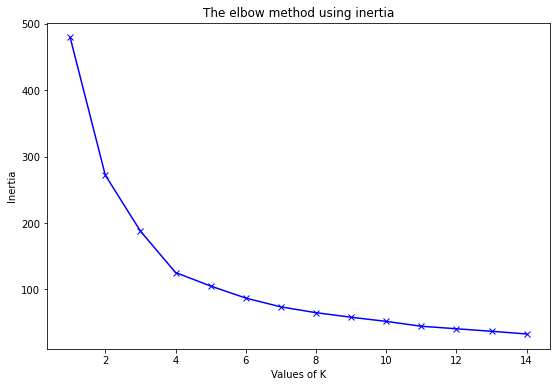

In [9]:
#Elbow Method
#Inertia:It is the sum of squared distances of samples to their closest cluster center.

inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(X_2)
    inertia.append(kmean.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

In [45]:
#K-Means Clustering

clf = KMeans(n_clusters=4)
clf.fit_predict(X_2)

labels = clf.labels_
centroids = clf.cluster_centers_

In [22]:
labels

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [27]:
centroids

array([[ 0.80089898, -0.95285608],
       [-1.14452586, -0.5020104 ],
       [ 1.12773395,  0.75231371],
       [-0.91689786,  1.23448152]])

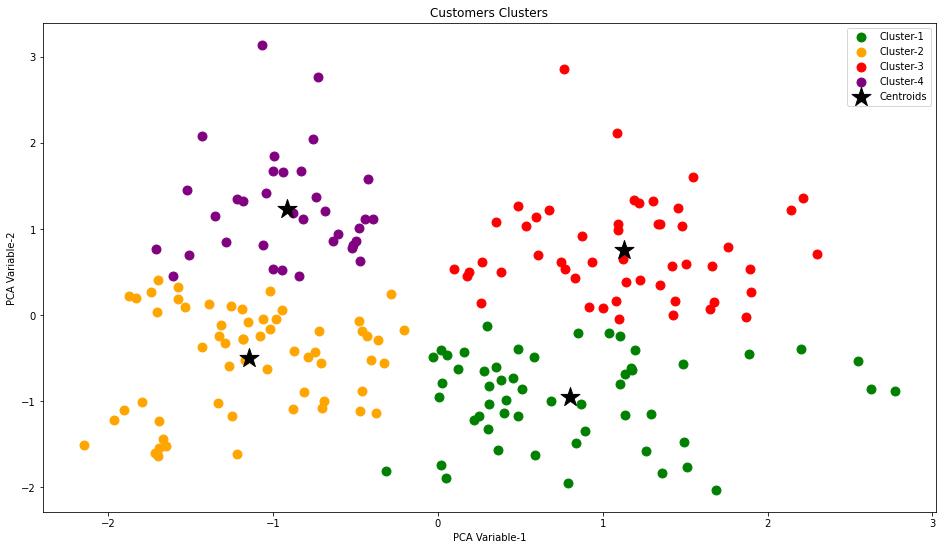

In [34]:
#cluster visualization
plt.figure(1,figsize=(16,9))

plt.scatter(X_2[labels == 0,0], X_2[labels==0,1], s=80, c='green', label='Cluster-1')
plt.scatter(X_2[labels == 1,0], X_2[labels==1,1], s=80, c='orange', label='Cluster-2')
plt.scatter(X_2[labels == 2,0], X_2[labels==2,1], s=80, c='red', label='Cluster-3')
plt.scatter(X_2[labels == 3,0], X_2[labels==3,1], s=80, c='purple', label='Cluster-4')

plt.scatter(centroids[:,0], centroids[:,1], s=400, c='black', marker='*',label='Centroids')

plt.title('Customers Clusters')
plt.xlabel('PCA Variable-1')
plt.ylabel('PCA Variable-2')
plt.legend()
plt.show()

## Age & Annual Income & Spending Score

Since there are 3 variables i.e we have 3 dimensions, we can create a 3D plot

In [60]:
X=df[['Age','Annual Income (k$)','Spending Score (1-100)']].values #.to_numpy()
X_3D=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
X_3D

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [49]:
#scaling 

sc = StandardScaler()
X = sc.fit_transform(X)
#X_3D = sc.fit_transform(X_3D)

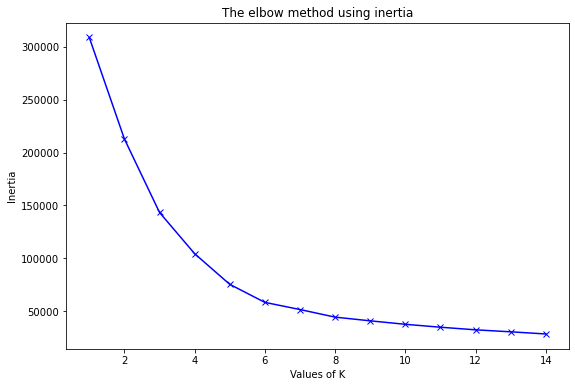

In [61]:
#Elbow Method
#Inertia:It is the sum of squared distances of samples to their closest cluster center.

inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(X)
    inertia.append(kmean.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

4 or 6 are the optimum numbers of clusters

In [65]:
#K-Means Clustering

clf = KMeans(n_clusters=6)
clf.fit_predict(X_3D)

labels = clf.labels_
centroids = clf.cluster_centers_

X_3D['Label'] = labels

In [66]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 5, 0,
       4, 3, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [67]:
X_3D

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


In [68]:
#cluster visualization
import plotly.express as px

px.scatter_3d(X_3D, x='Age',y='Annual Income (k$)', z='Spending Score (1-100)',
             color='Label', size='Label')


Frome above we can see:
    
    * People with less income and more spending score belongs to the age group of 20-25 mostly.
    * People with more income and more spending power belongs to age group 28-35,i.e. well established financial people.
    * People in the yellow zone are elderly people.

## Annual Income & Spending Score

In [74]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

We don't need to scale in this case since variance is equal when considering these 2 variables

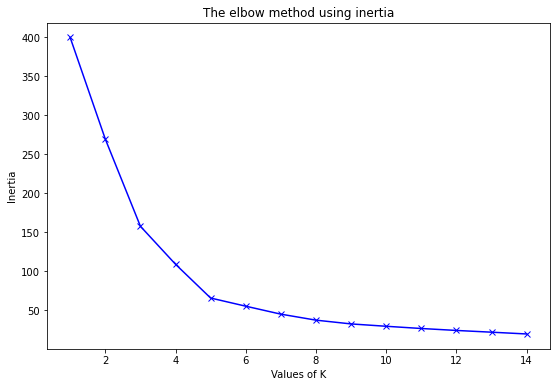

In [76]:
#Elbow Method
#Inertia:It is the sum of squared distances of samples to their closest cluster center.

inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(X)
    inertia.append(kmean.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

3 or 5 are the optimal numbers of K.

In [79]:
#K-Means Clustering

clf = KMeans(n_clusters=5)
clf.fit_predict(X)

labels = clf.labels_
centroids = clf.cluster_centers_

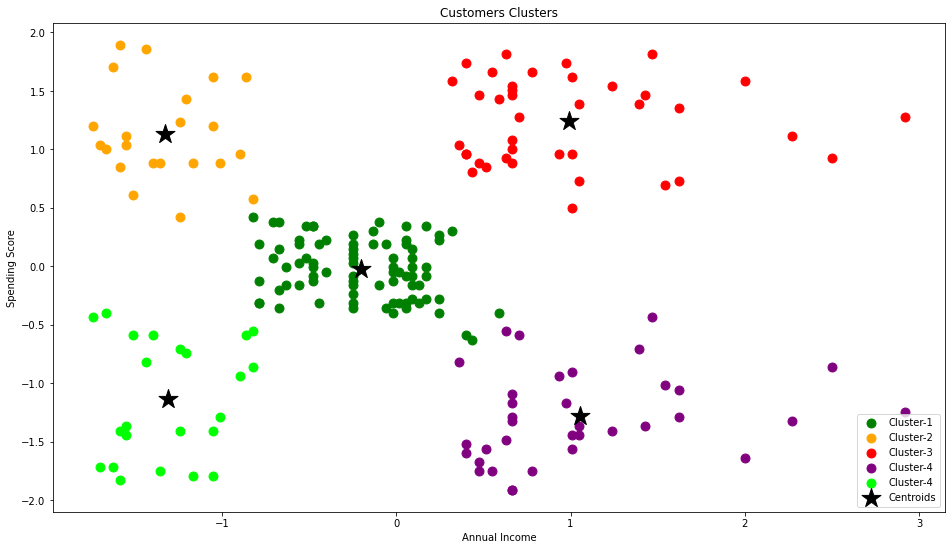

In [81]:
#cluster visualization

plt.figure(1,figsize=(16,9))

plt.scatter(X[labels == 0,0], X[labels==0,1], s=80, c='green', label='Cluster-1')
plt.scatter(X[labels == 1,0], X[labels==1,1], s=80, c='orange', label='Cluster-2')
plt.scatter(X[labels == 2,0], X[labels==2,1], s=80, c='red', label='Cluster-3')
plt.scatter(X[labels == 3,0], X[labels==3,1], s=80, c='purple', label='Cluster-4')
plt.scatter(X[labels == 4,0], X[labels==4,1], s=80, c='lime', label='Cluster-4')

plt.scatter(centroids[:,0], centroids[:,1], s=400, c='black', marker='*',label='Centroids')

plt.title('Customers Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

So yeah, we can distinctly see 5 cluster with few outliers, which is actually pretty impressive.

## K-Means Scratch

Let's see how our own model performs on this data, against sklearn,lol.

In [82]:
#we will do this with our income vs spending score data

X = df[['Annual Income (k$)','Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

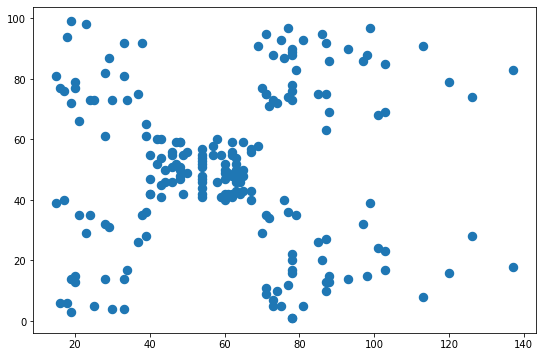

In [87]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,0], X[:,1], s=20, linewidths=5)

153.79972565157746
395.1388888888889
325.1043599257885
248.47839135654266
22.56410256410257
62.69598095187782
33.137241230781605
5.339844727017936
20.6651128086059
1.2260451171988616


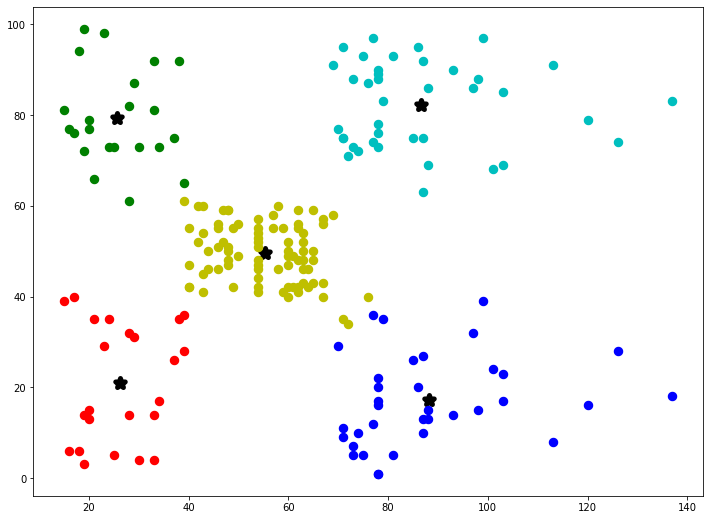

In [96]:
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        #pick staring centroids
        self.centroids = np.array([data[i] for i in range(self.k)])
        
        self.centroids = {}
        prev_centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            prev_centroids[i] = data[i]
        
        #if true
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            
            #cycle thorugh knowm data and assign it to class it is closest to
            for featureset in data:
                #compare distance to the centroids
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset) #classifying and appending diff clusters
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            #checking if our algorithm is optimized else we will keep on iterating
            optimized=True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid)/original_centroid*100.0))
                    
                    #since the distance is greater than tolerance our algo is not optimized
                    #hopefully it will get optimized in 300 iterations
                    #just kidding, it won't take that long
                    
                    optimized=False
                
            if optimized:
                break
                    
            
    def predict(self, data):
        #comparing distances to either centroids
        distances = [np.linalg.norm(data-self.centroids[centroid])
                             for centroid in self.centroids]
        print(distances)
        classification = distances.index(min(distances))
        return classification

clf = K_Means()
clf.fit(X)

plt.figure(figsize=(12,9))
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker='*', color='k', s=100, linewidth=5)

colors = ['r', 'g', 'b', 'c', 'y','k','y']
for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        color=colors[classification]
        plt.scatter(featureset[0], featureset[1], marker='o', c=color,
                    s=20, linewidth=5)
plt.show()

Which is actually pretty decent compared to sklearn.

### Conclusions

* As we saw from the correlation that age and spending score is inversely related.So yeah we can focus a little more there.

* Though the number of women are lesser than men in this study, still they did spend more than their sapien counterpart.We can allure them with better deals and treat them good.

* Next we see people in the range 20-25, even though they have less income they don't shy away from splurging. But some section of this group even though they have more spending power they spend very less. We should identify those people and give them something to keep them coming, because this group shows the most promise for the future.

* In the 3D plot represnted by yellow, we can see that people in this range are between 45-65. They spend some but they are just hanging in middle. We could influences these elderly people or yet to be, to improve our sales.Some promise here.

* The least promise group according to me is the middle aged group, though their will always be outliers, but this group which has high income are at the peak of their spending power and influencing them might do us little good.